In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fraudulent_claims_dataset.csv to Fraudulent_claims_dataset (1).csv


In [ ]:
import pandas as pd
import warnings; warnings.filterwarnings("ignore")

In [ ]:
fraudulent_claims = pd.read_csv('/content/Fraudulent_claims_dataset.csv')
fraudulent_claims.head()

,Claim_ID,Claim_Date,Policy_Issuance_Date,Customer_ID,Claim_Amount,Claim_Type,Annual_Income,Suspicious_Flags,Fraud_Label
0,CLM000001,10-10-2020,21-12-2012,CUST4020,20635.68,Home,120769.55,0,0
1,CLM000002,03-06-2023,02-06-2018,CUST8985,34662.22,Life,412022.47,0,0
2,CLM000003,06-04-2023,05-01-2022,CUST2792,64847.97,Home,110227.23,0,0
3,CLM000004,10-03-2023,29-04-2014,CUST9410,16906.56,Life,91553.79,0,0
4,CLM000005,26-01-2023,08-09-2018,CUST1702,64860.47,Life,53075.22,1,1


In [ ]:
fraudulent_claims.isna().sum()

,0
Claim_ID,0
Claim_Date,0
Policy_Issuance_Date,0
Customer_ID,0
Claim_Amount,0
Claim_Type,0
Annual_Income,0
Suspicious_Flags,0
Fraud_Label,0


In [ ]:
fraudulent_claims['Fraud_Label'].value_counts()

,count
Fraud_Label,
0,4256
1,744


In [ ]:
fraudulent_claims.describe()

,Claim_Amount,Annual_Income,Suspicious_Flags,Fraud_Label
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,33668.196580,149418.884660,0.159000,0.148800
std,22918.251982,107992.772865,0.365713,0.355927
min,1029.970000,1575.250000,0.000000,0.000000
25%,15815.672500,62364.892500,0.000000,0.000000
50%,27835.455000,125248.030000,0.000000,0.000000
75%,47101.642500,216051.562500,0.000000,0.000000
max,99991.090000,483352.660000,1.000000,1.000000


In [ ]:
fraudulent_claims.shape

(5000, 9)

In [ ]:
fraudulent_claims['Claim_Type'].unique()

array(['Home', 'Life', 'Auto', 'Medical'], dtype=object)

# EDA

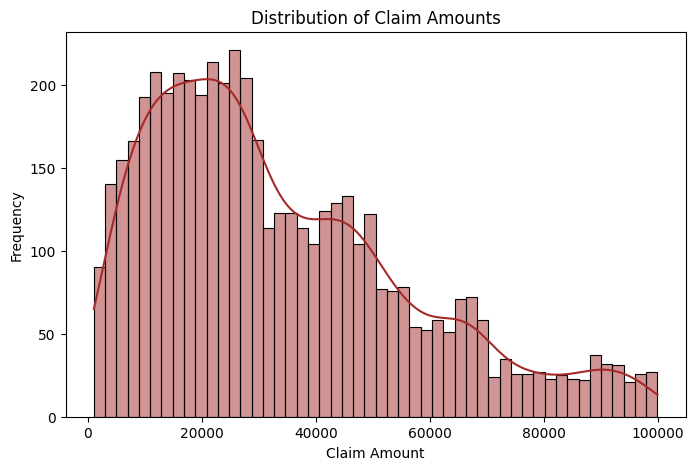

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(fraudulent_claims["Claim_Amount"], bins=50, kde=True, color="brown")
plt.title("Distribution of Claim Amounts")
plt.xlabel("Claim Amount")
plt.ylabel("Frequency")
plt.show()

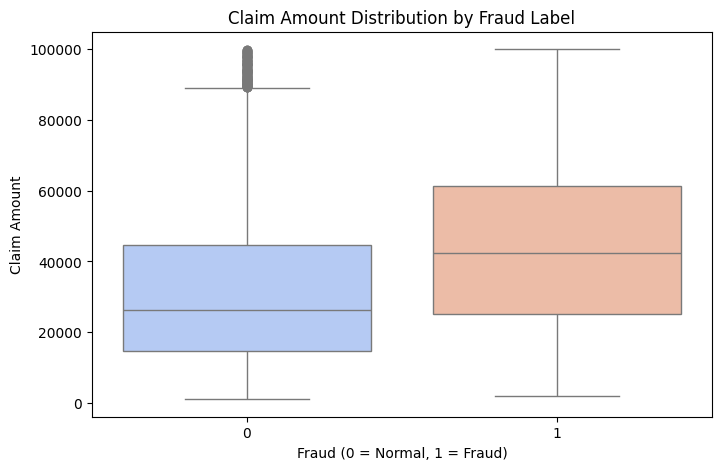

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=fraudulent_claims["Fraud_Label"], y=fraudulent_claims["Claim_Amount"], palette="coolwarm")
plt.title("Claim Amount Distribution by Fraud Label")
plt.xlabel("Fraud (0 = Normal, 1 = Fraud)")
plt.ylabel("Claim Amount")
plt.show()

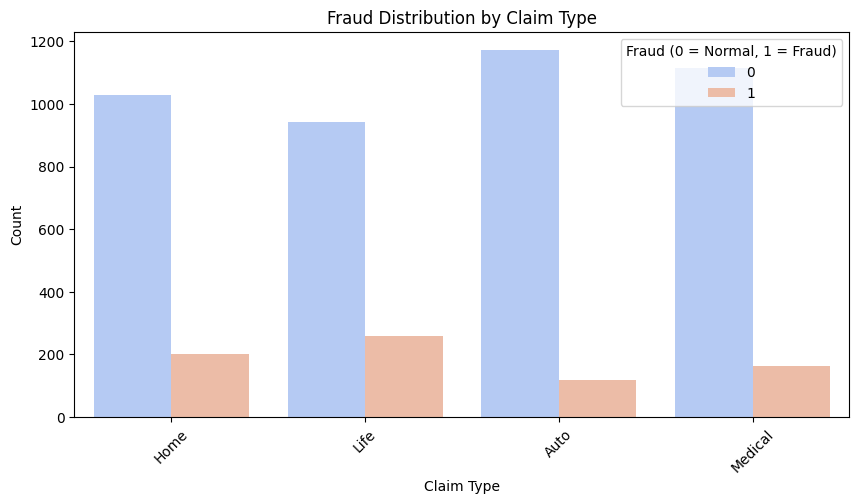

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Claim_Type", hue="Fraud_Label", data=fraudulent_claims, palette="coolwarm")
plt.title("Fraud Distribution by Claim Type")
plt.xlabel("Claim Type")
plt.ylabel("Count")
plt.legend(title="Fraud (0 = Normal, 1 = Fraud)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
fraudulent_claims['Claim_to_income_ratio'] = fraudulent_claims['Claim_Amount']/fraudulent_claims['Annual_Income']
fraudulent_claims.head()

,Claim_ID,Claim_Date,Policy_Issuance_Date,Customer_ID,Claim_Amount,Claim_Type,Annual_Income,Suspicious_Flags,Fraud_Label,Claim_to_income_ratio
0,CLM000001,10-10-2020,21-12-2012,CUST4020,20635.68,Home,120769.55,0,0,0.170868
1,CLM000002,03-06-2023,02-06-2018,CUST8985,34662.22,Life,412022.47,0,0,0.084127
2,CLM000003,06-04-2023,05-01-2022,CUST2792,64847.97,Home,110227.23,0,0,0.588312
3,CLM000004,10-03-2023,29-04-2014,CUST9410,16906.56,Life,91553.79,0,0,0.184663
4,CLM000005,26-01-2023,08-09-2018,CUST1702,64860.47,Life,53075.22,1,1,1.222048


In [ ]:
# Calculate the time difference between policy issuance and claim filing
fraudulent_claims['Policy_Claim_Diff'] = pd.to_datetime(fraudulent_claims['Claim_Date'], format="%d-%m-%Y") - pd.to_datetime(fraudulent_claims['Policy_Issuance_Date'],  format="%d-%m-%Y")

# Convert the time difference to days
fraudulent_claims['Policy_Claim_Diff_Days'] = fraudulent_claims['Policy_Claim_Diff'].dt.days


In [ ]:
fraudulent_claims.drop(['Policy_Claim_Diff'], axis = 1, inplace = True)
fraudulent_claims

,Claim_ID,Claim_Date,Policy_Issuance_Date,Customer_ID,Claim_Amount,Claim_Type,Annual_Income,Suspicious_Flags,Fraud_Label,Claim_to_income_ratio,Policy_Claim_Diff_Days
0,CLM000001,10-10-2020,21-12-2012,CUST4020,20635.68,Home,120769.55,0,0,0.170868,2850
1,CLM000002,03-06-2023,02-06-2018,CUST8985,34662.22,Life,412022.47,0,0,0.084127,1827
2,CLM000003,06-04-2023,05-01-2022,CUST2792,64847.97,Home,110227.23,0,0,0.588312,456
3,CLM000004,10-03-2023,29-04-2014,CUST9410,16906.56,Life,91553.79,0,0,0.184663,3237
4,CLM000005,26-01-2023,08-09-2018,CUST1702,64860.47,Life,53075.22,1,1,1.222048,1601
...,...,...,...,...,...,...,...,...,...,...,...
4995,CLM004996,04-01-2023,18-03-2020,CUST3914,35815.93,Medical,446398.45,0,0,0.080233,1022
4996,CLM004997,19-11-2024,06-07-2017,CUST3568,88092.00,Life,46434.22,1,1,1.897135,2693
4997,CLM004998,12-09-2022,16-11-2019,CUST9544,48806.95,Medical,106002.92,0,0,0.460430,1031
4998,CLM004999,05-02-2021,16-05-2013,CUST8225,95711.64,Life,332103.76,0,0,0.288198,2822


In [ ]:
fraudulent_claims = pd.get_dummies(fraudulent_claims, columns=['Claim_Type'], dtype = 'int', drop_first=False)

In [ ]:
fraudulent_claims = fraudulent_claims.drop(columns=['Claim_ID', 'Customer_ID', 'Claim_Date', 'Policy_Issuance_Date'])

In [ ]:
df_selected = fraudulent_claims[['Claim_Amount', 'Annual_Income', 'Claim_to_income_ratio', 'Policy_Claim_Diff_Days']].copy()

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor

elliptic = EllipticEnvelope(contamination=0.05)
iso_forest = IsolationForest(contamination=0.05, random_state=42)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

fraudulent_claims["Elliptic_Outlier"] = elliptic.fit_predict(df_selected)
fraudulent_claims["IsoForest_Outlier"] = iso_forest.fit_predict(df_selected)
fraudulent_claims["LOF_Outlier"] = lof.fit_predict(df_selected)

# Convert to binary: 1 = Outlier, 0 = Normal
for col in ["Elliptic_Outlier", "IsoForest_Outlier", "LOF_Outlier"]:
    fraudulent_claims[col] = fraudulent_claims[col].apply(lambda x: 1 if x == -1 else 0)

# Combine anomaly signals
fraudulent_claims["Anomaly_Flag"] = fraudulent_claims[["Elliptic_Outlier", "IsoForest_Outlier", "LOF_Outlier"]].max(axis=1)
fraudulent_claims["Anomaly_Score"] = fraudulent_claims[["Elliptic_Outlier", "IsoForest_Outlier", "LOF_Outlier"]].sum(axis=1)

In [ ]:
fraudulent_claims.head()

,Claim_Amount,Annual_Income,Suspicious_Flags,Fraud_Label,Claim_to_income_ratio,Policy_Claim_Diff_Days,Claim_Type_Auto,Claim_Type_Home,Claim_Type_Life,Claim_Type_Medical,Elliptic_Outlier,IsoForest_Outlier,LOF_Outlier,Anomaly_Flag,Anomaly_Score
0,20635.68,120769.55,0,0,0.170868,2850,0,1,0,0,0,0,0,0,0
1,34662.22,412022.47,0,0,0.084127,1827,0,0,1,0,0,0,0,0,0
2,64847.97,110227.23,0,0,0.588312,456,0,1,0,0,0,0,0,0,0
3,16906.56,91553.79,0,0,0.184663,3237,0,0,1,0,0,0,0,0,0
4,64860.47,53075.22,1,1,1.222048,1601,0,0,1,0,0,0,0,0,0


In [ ]:
X = fraudulent_claims.drop(columns=['Fraud_Label'])
y = fraudulent_claims['Fraud_Label']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# ⚖️ Scale Numerical Features for Neural Network
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Select only 'Annual_Income' and 'Claim_Amount' columns for scaling
# cols_to_scale = ['Claim_Amount', 'Annual_Income']
# scaler = StandardScaler()

# # Fit the scaler on the training data and transform both training and testing data
# X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
# X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


In [ ]:
import pickle

# Save the scaler to a file
with open('scaler_fraud_detection.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Download the saved scaler file
# files.download('scaler_fraud_detection.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# random forest model

from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

rf_model = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42)
rf_model.fit(X_train, y_train)
rf_probs = rf_model.predict_proba(X_test)[:, 1]

#  Train Neural Network

nn_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=500,
                         random_state=42, early_stopping=True, validation_fraction=0.1)
nn_model.fit(X_train_scaled, y_train)
nn_probs = nn_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# prompt: save the neural network model using pickle

import pickle

# Save the neural network model
with open('nn_model_fraud_detection.pkl', 'wb') as file:
    pickle.dump(nn_model, file)

# Download the saved model file
files.download('nn_model_fraud_detection.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 🧪 Combine Scores (Ensemble)
df_test = X_test.copy()
df_test['RF_Score'] = rf_probs
df_test['NN_Score'] = nn_probs
df_test['Anomaly_Score'] = X_test['Anomaly_Score']
df_test['Fraud_Score'] = (df_test['RF_Score'] + df_test['NN_Score'] + df_test['Anomaly_Score']) / 3
df_test['Actual_Label'] = y_test
df_test['Predicted_Label'] = (df_test['Fraud_Score'] >= 0.5).astype(int)

In [ ]:
# 🧾 Metrics
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, recall_score, precision_score

auc = roc_auc_score(df_test['Actual_Label'], df_test['Fraud_Score'])
accuracy = accuracy_score(df_test['Actual_Label'], df_test['Predicted_Label'])
f1 = f1_score(df_test['Actual_Label'], df_test['Predicted_Label'])
recall = recall_score(df_test['Actual_Label'], df_test['Predicted_Label'])

# 📊 Results
print(f"AUC-ROC Score: {auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")


AUC-ROC Score: 0.8835
Accuracy: 0.8980
F1 Score: 0.6165
Recall: 0.5616


In [ ]:
df_test = X_test.copy()
df_test['RF_Score'] = rf_probs
df_test['NN_Score'] = nn_probs
df_test['Anomaly_Score'] = X_test['Anomaly_Score']
df_test['Fraud_Score_RF'] = (0.45 * df_test['RF_Score'] + 0.45 * df_test['NN_Score'] + 0.1 * df_test['Anomaly_Score'])
df_test['Actual_Label'] = y_test
df_test['Predicted_Label'] = (df_test['Fraud_Score_RF'] >= 0.41).astype(int)

In [ ]:
# Random forest Metrics
from collections import Counter

auc = roc_auc_score(df_test['Actual_Label'], df_test['Fraud_Score_RF'])
accuracy = accuracy_score(df_test['Actual_Label'], df_test['Predicted_Label'])
f1 = f1_score(df_test['Actual_Label'], df_test['Predicted_Label'])
recall = recall_score(df_test['Actual_Label'], df_test['Predicted_Label'])
precision = precision_score(df_test['Actual_Label'], df_test['Predicted_Label'])


# Results
print("Random Forest Model Metrics:")
print(f"AUC-ROC Score: {auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Random Forest Model Metrics:
AUC-ROC Score: 0.8965
Accuracy: 0.9390
F1 Score: 0.7987
Precision: 0.7707
Recall: 0.8288


In [ ]:
#Xgboost model
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# 1. Train XGBoost Model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# 2. Predict probabilities
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# 3. Ensemble Fraud Score (same weighting as before or update)
df_test['XGB_Score'] = xgb_probs
df_test['Fraud_Score_XGB'] = (0.45 * xgb_probs + 0.45 * df_test['NN_Score'] + 0.1 * df_test['Anomaly_Score'])

# 4. Optimize threshold using precision-recall
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(df_test['Actual_Label'], df_test['Fraud_Score_XGB'])
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]

df_test['Predicted_Label_XGB'] = (df_test['Fraud_Score_XGB'] >= best_threshold).astype(int)

# 5. Final metrics
print("XGBoost Model Metrics (Ensemble):")
print("AUC-ROC Score:", roc_auc_score(df_test['Actual_Label'], df_test['Fraud_Score_XGB']))
print("Accuracy:", accuracy_score(df_test['Actual_Label'], df_test['Predicted_Label_XGB']))
print("Precision:", precision_score(df_test['Actual_Label'], df_test['Predicted_Label_XGB']))
print("Recall:", recall_score(df_test['Actual_Label'], df_test['Predicted_Label_XGB']))
print("F1 Score:", f1_score(df_test['Actual_Label'], df_test['Predicted_Label_XGB']))

XGBoost Model Metrics (Ensemble):
AUC-ROC Score: 0.8952471848833852
Accuracy: 0.938
Precision: 0.7658227848101266
Recall: 0.8287671232876712
F1 Score: 0.7960526315789473


In [ ]:
# lightgbm model
import lightgbm as lgb

# 1. Train LightGBM Model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

# 2. Predict probabilities
lgb_probs = lgb_model.predict_proba(X_test)[:, 1]

# 3. Ensemble Fraud Score
df_test['LGBM_Score'] = lgb_probs
df_test['Fraud_Score_LGBM'] = (0.45 * lgb_probs + 0.45 * df_test['NN_Score'] + 0.1 * df_test['Anomaly_Score'])

# 4. Optimize threshold using precision-recall
precision, recall, thresholds = precision_recall_curve(df_test['Actual_Label'], df_test['Fraud_Score_LGBM'])
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]

df_test['Predicted_Label_LGBM'] = (df_test['Fraud_Score_LGBM'] >= best_threshold).astype(int)

# 5. Final metrics
print("LightGBM Model Metrics (Ensemble):")
print("AUC-ROC Score:", roc_auc_score(df_test['Actual_Label'], df_test['Fraud_Score_LGBM']))
print("Accuracy:", accuracy_score(df_test['Actual_Label'], df_test['Predicted_Label_LGBM']))
print("Precision:", precision_score(df_test['Actual_Label'], df_test['Predicted_Label_LGBM']))
print("Recall:", recall_score(df_test['Actual_Label'], df_test['Predicted_Label_LGBM']))
print("F1 Score:", f1_score(df_test['Actual_Label'], df_test['Predicted_Label_LGBM']))

[LightGBM] [Info] Number of positive: 598, number of negative: 3402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.149500 -> initscore=-1.738528
[LightGBM] [Info] Start training from score -1.738528
LightGBM Model Metrics (Ensemble):
AUC-ROC Score: 0.9019200538962497
Accuracy: 0.94
Precision: 0.7721518987341772
Recall: 0.8356164383561644
F1 Score: 0.8026315789473685


In [ ]:
auc = roc_auc_score(df_test['Actual_Label'], df_test['Fraud_Score_RF'])
accuracy = accuracy_score(df_test['Actual_Label'], df_test['Predicted_Label'])
f1 = f1_score(df_test['Actual_Label'], df_test['Predicted_Label'])
recall = recall_score(df_test['Actual_Label'], df_test['Predicted_Label'])
precision = precision_score(df_test['Actual_Label'], df_test['Predicted_Label'])


print("Random Forest Model Metrics:")
print(f"AUC-ROC Score: {auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

#Xgboost model metrics
print("XGBoost Model Metrics (Ensemble):")
print("AUC-ROC Score:", roc_auc_score(df_test['Actual_Label'], df_test['Fraud_Score_XGB']))
print("Accuracy:", accuracy_score(df_test['Actual_Label'], df_test['Predicted_Label_XGB']))
print("Precision:", precision_score(df_test['Actual_Label'], df_test['Predicted_Label_XGB']))
print("Recall:", recall_score(df_test['Actual_Label'], df_test['Predicted_Label_XGB']))
print("F1 Score:", f1_score(df_test['Actual_Label'], df_test['Predicted_Label_XGB']))

# lightgbm model metrics
print("LightGBM Model Metrics (Ensemble):")
print("AUC-ROC Score:", roc_auc_score(df_test['Actual_Label'], df_test['Fraud_Score_LGBM']))
print("Accuracy:", accuracy_score(df_test['Actual_Label'], df_test['Predicted_Label_LGBM']))
print("Precision:", precision_score(df_test['Actual_Label'], df_test['Predicted_Label_LGBM']))
print("Recall:", recall_score(df_test['Actual_Label'], df_test['Predicted_Label_LGBM']))
print("F1 Score:", f1_score(df_test['Actual_Label'], df_test['Predicted_Label_LGBM']))


Random Forest Model Metrics:
AUC-ROC Score: 0.8965
Accuracy: 0.9390
F1 Score: 0.7987
Precision: 0.7707
Recall: 0.8288
XGBoost Model Metrics (Ensemble):
AUC-ROC Score: 0.8952471848833852
Accuracy: 0.938
Precision: 0.7658227848101266
Recall: 0.8287671232876712
F1 Score: 0.7960526315789473
LightGBM Model Metrics (Ensemble):
AUC-ROC Score: 0.8981986461775368
Accuracy: 0.94
Precision: 0.7721518987341772
Recall: 0.8356164383561644
F1 Score: 0.8026315789473685


In [ ]:
from sklearn.metrics import (
    roc_auc_score, precision_score, recall_score,
    f1_score, accuracy_score, precision_recall_curve
)

# Predict probabilities
y_probs = lgb_model.predict_proba(X_test)[:, 1]

# Store in DataFrame
df_test = X_test.copy()
df_test['Actual_Label'] = y_test
df_test['Fraud_Score'] = y_probs

# Find best threshold based on F1 score
precision, recall, thresholds = precision_recall_curve(df_test['Actual_Label'], df_test['Fraud_Score'])
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_idx = f1_scores.argmax()
best_threshold = thresholds[best_idx]

# Apply optimal threshold
df_test['Predicted_Label'] = (df_test['Fraud_Score'] >= best_threshold).astype(int)

# Calculate metrics
auc = roc_auc_score(df_test['Actual_Label'], df_test['Fraud_Score'])
accuracy = accuracy_score(df_test['Actual_Label'], df_test['Predicted_Label'])
precision_final = precision_score(df_test['Actual_Label'], df_test['Predicted_Label'])
recall_final = recall_score(df_test['Actual_Label'], df_test['Predicted_Label'])
f1_final = f1_score(df_test['Actual_Label'], df_test['Predicted_Label'])

# Print results
print(f"Best Threshold: {best_threshold:.2f}")
print(f"AUC-ROC Score: {auc:.4f}")
print(f"Optimized Accuracy: {accuracy:.4f}")
print(f"Optimized Precision: {precision_final:.4f}")
print(f"Optimized Recall: {recall_final:.4f}")
print(f"Optimized F1 Score: {f1_final:.4f}")

Best Threshold: 0.28
AUC-ROC Score: 0.9045
Optimized Accuracy: 0.9370
Optimized Precision: 0.7610
Optimized Recall: 0.8288
Optimized F1 Score: 0.7934


In [ ]:
import pickle

# Save the best XGBoost model
with open('best_lgb_model_fraud_detection.pkl', 'wb') as f:
    pickle.dump(lgb_model, f)


# Download the saved model
files.download('best_lgb_model_fraud_detection.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

import pandas as pd
import pickle
# Load the saved model
with open('best_lgb_model_fraud_detection.pkl', 'rb') as f:
    loaded_lgb_model = pickle.load(f)

print(loaded_lgb_model.feature_name_)

['Claim_Amount', 'Annual_Income', 'Suspicious_Flags', 'Claim_to_income_ratio', 'Policy_Claim_Diff_Days', 'Claim_Type_Auto', 'Claim_Type_Home', 'Claim_Type_Life', 'Claim_Type_Medical', 'Elliptic_Outlier', 'IsoForest_Outlier', 'LOF_Outlier', 'Anomaly_Flag', 'Anomaly_Score']


In [ ]:
# Save preprocessed dataset to CSV
df_test.to_csv("preprocessed_insurance_fraud_data.csv", index=False)
print("Preprocessed data saved as 'preprocessed_insurance_fraud_data.csv'")

Preprocessed data saved as 'preprocessed_insurance_fraud_data.csv'


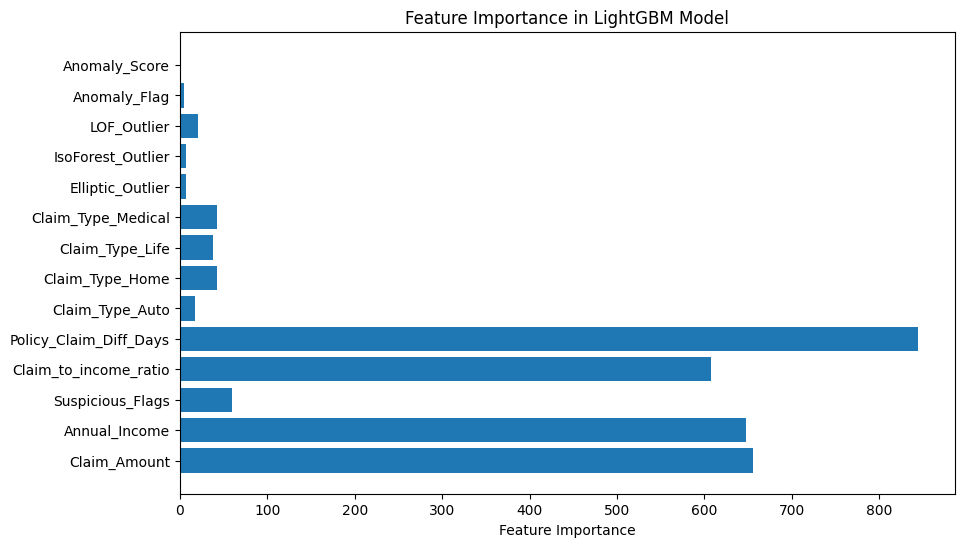

In [ ]:
import matplotlib.pyplot as plt

# Feature importance
importances = lgb_model.booster_.feature_importance()
features = lgb_model.booster_.feature_name()

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in LightGBM Model")
plt.show()